# Can a machine predict a person's gender based on their tweet?

Steps:
1. Pull twitter data 
2. Store into dataframe
3. Classify male/female
4. Run model
5. Test with real tweet

In [134]:
import numpy as np
import pandas as pd
import tweepy as tw
import json
import pprint
from matplotlib import pyplot as plt

In [2]:
path_auth = '/Users/allenj/Documents/Keys/auth_twitter.json'
auth = json.loads(open(path_auth).read())
pp = pprint.PrettyPrinter(indent=4)

my_consumer_key = auth['my_consumer_key']
my_consumer_secret = auth['my_consumer_secret']
my_access_token = auth['your_access_token']
my_access_token_secret = auth['my_access_token_secret']

In [3]:
auth = tw.OAuthHandler(my_consumer_key, my_consumer_secret)
auth.set_access_token(my_access_token, my_access_token_secret)
api = tw.API(auth)

In [4]:
type(api)

tweepy.api.API

In [5]:
# Get tweets
tweets = api.user_timeline(screen_name="HillaryClinton", count=5, include_rts=False)
for tweet in tweets:
    print(tweet.text)

George Floyd’s life mattered. 

Ahmaud Arbery and Breonna Taylor's lives mattered.

Christian Cooper’s life matters… https://t.co/GO6kIO6BQ3
Over the last 24 hours, the 100,000th American died of COVID-19 on Trump’s watch.

He’s spent the last 24 hours sha… https://t.co/kPNqduLHZj
Both vulnerable communities and those in positions of power are indebted to the activists who push for progress. La… https://t.co/a1acpcEiin
We can protect public health and our democracy. 

We'll do it by filing lawsuits now to expand and safeguard vote b… https://t.co/2dRd3hu5bK


In [95]:
tweets = api.user_timeline(screen_name="BarackObama", count=5, include_rts=False)
for tweet in tweets:
    print(tweet.text)

If you believe in a more just, more generous, more democratic America, now is the time to fight for it. Here’s a te… https://t.co/wjDlgys1Uc
On Memorial Day, we honor those who gave all for us. That takes different forms this year, but it’s even more vital… https://t.co/wUBXJWWoKs
And here’s more on the approach Sweden has taken, which differs from some of its neighbors: 

https://t.co/Qw5R0O5RhM
South Korea has focused on testing to guard against outbreaks:

https://t.co/51h11Pb3HZ
As all 50 states begin the process of reopening, here are three articles that offer some lessons from other countri… https://t.co/k6xeoaH9zm


In [62]:
# Define search term
search_words = "#wildfires"
date_since = "2018-11-16"

# Collect tweets
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items(5)
tweets

In [63]:
# Iterate and print tweets
for tweet in tweets:
    print(tweet.text)

RT @Univ_inenglish: The best way to fight a #fire is with prevention since 98% of them are caused by human activity. Today, #Mexican author…
Looking for family projects as you #StayAtHome? Here are 30 #EmergencyPreparedness tips for #hurricanes, #tornadoes… https://t.co/4hOHdo2OL2
The best way to fight a #fire is with prevention since 98% of them are caused by human activity. Today, #Mexican au… https://t.co/2DNIbzQrk6
RT @tamraraven: #10km3x2 #COVID19 DEAD 100,000 #exponentialGROWTH #K12 #climateChange #wildfires destroyslocal #biodiversity YOU #WorkFromH…
#10km3x2 #COVID19 DEAD 100,000 #exponentialGROWTH #K12 #climateChange #wildfires destroyslocal #biodiversity YOU… https://t.co/TeMQIwnpP1


In [65]:
# Collect tweets
tweets = tw.Cursor(api.search,
                       q=search_words,
                       lang="en",
                       since=date_since).items(5)

# Collect a list of tweets
[tweet.text for tweet in tweets]

['RT @Univ_inenglish: The best way to fight a #fire is with prevention since 98% of them are caused by human activity. Today, #Mexican author…',
 'Looking for family projects as you #StayAtHome? Here are 30 #EmergencyPreparedness tips for #hurricanes, #tornadoes… https://t.co/4hOHdo2OL2',
 'The best way to fight a #fire is with prevention since 98% of them are caused by human activity. Today, #Mexican au… https://t.co/2DNIbzQrk6',
 'RT @tamraraven: #10km3x2 #COVID19 DEAD 100,000 #exponentialGROWTH #K12 #climateChange #wildfires destroyslocal #biodiversity YOU #WorkFromH…',
 '#10km3x2 #COVID19 DEAD 100,000 #exponentialGROWTH #K12 #climateChange #wildfires destroyslocal #biodiversity YOU… https://t.co/TeMQIwnpP1']

In [80]:
# Collect into dataframe
tweets = tw.Cursor(api.search, 
                           q=search_words,
                           lang="en",
                           since=date_since).items(5)

users_text = [[tweet.user.screen_name, tweet.text] for tweet in tweets]
users_text

[['AntheralHazel',
  'RT @Univ_inenglish: The best way to fight a #fire is with prevention since 98% of them are caused by human activity. Today, #Mexican author…'],
 ['El_Universal_Mx',
  'RT @Univ_inenglish: The best way to fight a #fire is with prevention since 98% of them are caused by human activity. Today, #Mexican author…'],
 ['cassandra17lina',
  'Looking for family projects as you #StayAtHome? Here are 30 #EmergencyPreparedness tips for #hurricanes, #tornadoes… https://t.co/4hOHdo2OL2'],
 ['Univ_inenglish',
  'The best way to fight a #fire is with prevention since 98% of them are caused by human activity. Today, #Mexican au… https://t.co/2DNIbzQrk6'],
 ['jc_james_clark',
  'RT @tamraraven: #10km3x2 #COVID19 DEAD 100,000 #exponentialGROWTH #K12 #climateChange #wildfires destroyslocal #biodiversity YOU #WorkFromH…']]

In [81]:
tweet_text = pd.DataFrame(data=users_text, 
                    columns=['user', "text"])
tweet_text

,user,text
0,AntheralHazel,RT @Univ_inenglish: The best way to fight a #f...
1,El_Universal_Mx,RT @Univ_inenglish: The best way to fight a #f...
2,cassandra17lina,Looking for family projects as you #StayAtHome...
3,Univ_inenglish,The best way to fight a #fire is with preventi...
4,jc_james_clark,"RT @tamraraven: #10km3x2 #COVID19 DEAD 100,000..."


In [73]:
# Now do it based off of users

In [79]:
# Collect tweets
tweets = api.user_timeline(screen_name="BarackObama", count=5, include_rts=False)
tweets

[Status(_api=<tweepy.api.API object at 0x120c8c590>, _json={'created_at': 'Wed May 27 15:00:15 +0000 2020', 'id': 1265659084524728321, 'id_str': '1265659084524728321', 'text': 'If you believe in a more just, more generous, more democratic America, now is the time to fight for it. Here’s a te… https://t.co/wjDlgys1Uc', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/wjDlgys1Uc', 'expanded_url': 'https://twitter.com/i/web/status/1265659084524728321', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 813286, 'id_str': '813286', 'name': 'Barack Obama', 'screen_name': 'BarackObama', 'location': 'Washington, DC', 'description': 'Dad, husband, Presi

In [77]:
# Iterate and print tweets
for tweet in tweets:
    print(tweet.text)

If you believe in a more just, more generous, more democratic America, now is the time to fight for it. Here’s a te… https://t.co/wjDlgys1Uc
On Memorial Day, we honor those who gave all for us. That takes different forms this year, but it’s even more vital… https://t.co/wUBXJWWoKs
And here’s more on the approach Sweden has taken, which differs from some of its neighbors: 

https://t.co/Qw5R0O5RhM
South Korea has focused on testing to guard against outbreaks:

https://t.co/51h11Pb3HZ
As all 50 states begin the process of reopening, here are three articles that offer some lessons from other countri… https://t.co/k6xeoaH9zm


In [78]:
# Collect a list of tweets
tweets = api.user_timeline(screen_name="BarackObama", count=5, include_rts=False)

[tweet.text for tweet in tweets]

['If you believe in a more just, more generous, more democratic America, now is the time to fight for it. Here’s a te… https://t.co/wjDlgys1Uc',
 'On Memorial Day, we honor those who gave all for us. That takes different forms this year, but it’s even more vital… https://t.co/wUBXJWWoKs',
 'And here’s more on the approach Sweden has taken, which differs from some of its neighbors: \n\nhttps://t.co/Qw5R0O5RhM',
 'South Korea has focused on testing to guard against outbreaks:\n\nhttps://t.co/51h11Pb3HZ',
 'As all 50 states begin the process of reopening, here are three articles that offer some lessons from other countri… https://t.co/k6xeoaH9zm']

In [5]:
tweets = api.user_timeline(screen_name="BarackObama", count=10, include_rts=False)
users_text = [[tweet.user.screen_name, tweet.text] for tweet in tweets]
tweet_text = pd.DataFrame(data=users_text, 
                    columns=['user', "text"])
tweet_text

,user,text
0,BarackObama,"If you believe in a more just, more generous, ..."
1,BarackObama,"On Memorial Day, we honor those who gave all f..."
2,BarackObama,And here’s more on the approach Sweden has tak...
3,BarackObama,South Korea has focused on testing to guard ag...
4,BarackObama,As all 50 states begin the process of reopenin...
5,BarackObama,The Class of 2020 is full of the leaders we ne...
6,BarackObama,"As Chicago navigates the health crisis, its re..."
7,BarackObama,"Congrats to the high school Class of 2020, as ..."
8,BarackObama,Congratulations to the HBCU Class of 2020! Mic...


In [55]:
# Screen names of most popular twitter accounts with gender
# 0 = male, 1 = female
users = [['jimmyfallon',0],
         ['shakira',1],
         ['ddlovato',1],
         ['britneyspears',1],
         ['narendramodi',0],
         ['selenagomez',1],
         ['jtimberlake',0],
         ['kimkardashian',1],
         ['arianagrande',1],
         ['realdonaldtrump',0],
         ['theellenshow',1],
         ['ladygaga',1],
         ['cristiano',0],
         ['taylorswift13',1],
         ['rihanna',1],
         ['katyperry',1],
         ['justinbieber',0],
         ['barackobama',0],
         ['TheRock',0]]

In [66]:
# Convert user list into dataframe
users_df = pd.DataFrame(users, columns=["user", "gender"])
user_only = users_df["user"]
users_df

,user,gender
0,jimmyfallon,0
1,shakira,1
2,ddlovato,1
3,britneyspears,1
4,narendramodi,0
5,selenagomez,1
6,jtimberlake,0
7,kimkardashian,1
8,arianagrande,1
9,realdonaldtrump,0


In [70]:
users_df.to_csv(r'../Data/users.csv')

In [80]:
# Upload complete list of users
users = pd.read_csv('../Data/users.csv')
users

,user,name,gender,followers_millions,activity,country
0,BarackObama,Barack Obama,0,118,Former U.S. president,United States
1,justinbieber,Justin Bieber,0,111,Musician,Canada
2,katyperry,Katy Perry,1,108,Musician,United States
3,rihanna,Rihanna,1,96,Musician and businesswoman,Barbados
4,taylorswift13,Taylor Swift,1,86,Musician,United States
5,Cristiano,Cristiano Ronaldo,0,84,Footballer,Portugal
6,ladygaga,Lady Gaga,1,81,Musician and actress,United States
7,realDonaldTrump,Donald Trump,0,80,Current U.S. president,United States
8,TheEllenShow,Ellen DeGeneres,1,80,Comedian and television hostess,United States
9,ArianaGrande,Ariana Grande,1,74,Musician and actress,United States


In [86]:
list = []

for index, row in users.iterrows():
    tweets = api.user_timeline(screen_name=row['user'], count=300, include_rts=False)
    users_text = [[tweet.user.screen_name, tweet.text, row['gender']] for tweet in tweets]
    tweet_text = pd.DataFrame(data=users_text, 
                        columns=["user", "text", "gender"])
    list.append(tweet_text)

In [97]:
tweets = pd.concat(list) # Merge the list

In [98]:
# list = []

# for i, j in users_df: 
#     tweets = api.user_timeline(screen_name=i, count=1, include_rts=False)
#     users_text = [[tweet.user.screen_name, tweet.text, j] for tweet in tweets]
#     tweet_text = pd.DataFrame(data=users_text, 
#                         columns=["user", "text", "gender"])
#     list.append(tweet_text)

# list

In [100]:
tweets.to_csv(r'../Data/tweets.csv')

In [113]:
tweets.columns
tweets

,user,text,gender,clean_text
0,BarackObama,"If you believe in a more just, more generous, ...",0,"If you believe in a more just, more generous, ..."
1,BarackObama,"On Memorial Day, we honor those who gave all f...",0,"On Memorial Day, we honor those who gave all f..."
2,BarackObama,And here’s more on the approach Sweden has tak...,0,And here’s more on the approach Sweden has tak...
3,BarackObama,South Korea has focused on testing to guard ag...,0,South Korea has focused on testing to guard ag...
4,BarackObama,As all 50 states begin the process of reopenin...,0,As all 50 states begin the process of reopenin...
...,...,...,...,...
166,NICKIMINAJ,🗣 @DaBabyDaBaby 🔥 #iPhone #Kirk #DaBaby #DaBar...,1,🗣 DaBabyDaBaby 🔥 #iPhone #Kirk #DaBaby #DaBarb...
167,NICKIMINAJ,♥️ My @fendi collection will be available on h...,1,♥️ My fendi collection will be available on ht...
168,NICKIMINAJ,https://t.co/Xr78vRr7L3 #Fendi,1,https://t.co/Xr78vRr7L3 #Fendi
169,NICKIMINAJ,Don’t you ever doubt yourself. If anyone would...,1,Don’t you ever doubt yourself. If anyone would...


In [105]:
# tweets2 = pd.read_csv('../Data/tweets2.csv')
# tweets2.head(100)

In [104]:
tweets.groupby(["user", "gender"]).size()

user             gender
Adele            1         194
AnushkaSharma    1         155
ArianaGrande     1         112
AvrilLavigne     1         135
BarackObama      0         184
BeingSalmanKhan  0         198
BillGates        0         193
BrunoMars        0         183
Cristiano        0         200
Drake            0         132
EmmaWatson       1          88
Harry_Styles     0         191
HillaryClinton   1         157
JLo              1         137
KevinHart4real   0         158
KimKardashian    1         138
KingJames        0         145
LilTunechi       0         171
Louis_Tomlinson  0         194
MariahCarey      1         151
MileyCyrus       1         150
NICKIMINAJ       1         171
NiallOfficial    0         166
Oprah            1         180
SrBachchan       0         191
TheEllenShow     1         196
akshaykumar      0         185
aliciakeys       1         168
britneyspears    1         178
ddlovato         1         108
elonmusk         0         176
iamsrk         

# Prepare the text

In [109]:
import re

In [114]:
tweets

,user,text,gender,clean_text
0,BarackObama,"If you believe in a more just, more generous, ...",0,"If you believe in a more just, more generous, ..."
1,BarackObama,"On Memorial Day, we honor those who gave all f...",0,"On Memorial Day, we honor those who gave all f..."
2,BarackObama,And here’s more on the approach Sweden has tak...,0,And here’s more on the approach Sweden has tak...
3,BarackObama,South Korea has focused on testing to guard ag...,0,South Korea has focused on testing to guard ag...
4,BarackObama,As all 50 states begin the process of reopenin...,0,As all 50 states begin the process of reopenin...
...,...,...,...,...
166,NICKIMINAJ,🗣 @DaBabyDaBaby 🔥 #iPhone #Kirk #DaBaby #DaBar...,1,🗣 DaBabyDaBaby 🔥 #iPhone #Kirk #DaBaby #DaBarb...
167,NICKIMINAJ,♥️ My @fendi collection will be available on h...,1,♥️ My fendi collection will be available on ht...
168,NICKIMINAJ,https://t.co/Xr78vRr7L3 #Fendi,1,https://t.co/Xr78vRr7L3 #Fendi
169,NICKIMINAJ,Don’t you ever doubt yourself. If anyone would...,1,Don’t you ever doubt yourself. If anyone would...


In [116]:
# Clean the text
def remove_pattern(text,pattern):
    
    # re.findall() finds the pattern i.e @user and puts it in a list for further task
    r = re.findall(pattern,text)
    
    # re.sub() removes @user from the sentences in the dataset
    for i in r:
        text = re.sub(i,"",text)
    
    return text

#Remove @ symbol
tweets['clean_text'] = np.vectorize(remove_pattern)(tweets['text'], "@[\w]*")
tweets['clean_text'] = np.vectorize(remove_pattern)(tweets['text'], "http*")
tweets

,user,text,gender,clean_text
0,BarackObama,"If you believe in a more just, more generous, ...",0,"If you believe in a more just, more generous, ..."
1,BarackObama,"On Memorial Day, we honor those who gave all f...",0,"On Memorial Day, we honor those who gave all f..."
2,BarackObama,And here’s more on the approach Sweden has tak...,0,And here’s more on the approach Sweden has tak...
3,BarackObama,South Korea has focused on testing to guard ag...,0,South Korea has focused on testing to guard ag...
4,BarackObama,As all 50 states begin the process of reopenin...,0,As all 50 states begin the process of reopenin...
...,...,...,...,...
166,NICKIMINAJ,🗣 @DaBabyDaBaby 🔥 #iPhone #Kirk #DaBaby #DaBar...,1,🗣 @DaBabyDaBaby 🔥 #iPhone #Kirk #DaBaby #DaBar...
167,NICKIMINAJ,♥️ My @fendi collection will be available on h...,1,♥️ My @fendi collection will be available on s...
168,NICKIMINAJ,https://t.co/Xr78vRr7L3 #Fendi,1,s://t.co/Xr78vRr7L3 #Fendi
169,NICKIMINAJ,Don’t you ever doubt yourself. If anyone would...,1,Don’t you ever doubt yourself. If anyone would...


In [117]:
# Remove punctuation, numbers, and special characters
tweets['clean_text'] = tweets['clean_text'].str.replace("[^a-zA-Z#]", " ")
tweets.head(10)

,user,text,gender,clean_text
0,BarackObama,"If you believe in a more just, more generous, ...",0,If you believe in a more just more generous ...
1,BarackObama,"On Memorial Day, we honor those who gave all f...",0,On Memorial Day we honor those who gave all f...
2,BarackObama,And here’s more on the approach Sweden has tak...,0,And here s more on the approach Sweden has tak...
3,BarackObama,South Korea has focused on testing to guard ag...,0,South Korea has focused on testing to guard ag...
4,BarackObama,As all 50 states begin the process of reopenin...,0,As all states begin the process of reopenin...
5,BarackObama,The Class of 2020 is full of the leaders we ne...,0,The Class of is full of the leaders we ne...
6,BarackObama,"As Chicago navigates the health crisis, its re...",0,As Chicago navigates the health crisis its re...
7,BarackObama,"Congrats to the high school Class of 2020, as ...",0,Congrats to the high school Class of as ...
8,BarackObama,Congratulations to the HBCU Class of 2020! Mic...,0,Congratulations to the HBCU Class of Mic...
9,BarackObama,Graduating is a big achievement no matter what...,0,Graduating is a big achievement no matter what...


In [118]:
# Remove short words less than 2
tweets['clean_text'] = tweets['clean_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
tweets.head(10)

,user,text,gender,clean_text
0,BarackObama,"If you believe in a more just, more generous, ...",0,believe more just more generous more democrati...
1,BarackObama,"On Memorial Day, we honor those who gave all f...",0,Memorial honor those gave That takes different...
2,BarackObama,And here’s more on the approach Sweden has tak...,0,here more approach Sweden taken which differs ...
3,BarackObama,South Korea has focused on testing to guard ag...,0,South Korea focused testing guard against outb...
4,BarackObama,As all 50 states begin the process of reopenin...,0,states begin process reopening here three arti...
5,BarackObama,The Class of 2020 is full of the leaders we ne...,0,Class full leaders need bend history toward be...
6,BarackObama,"As Chicago navigates the health crisis, its re...",0,Chicago navigates health crisis residents cont...
7,BarackObama,"Congrats to the high school Class of 2020, as ...",0,Congrats high school Class well teachers coach...
8,BarackObama,Congratulations to the HBCU Class of 2020! Mic...,0,Congratulations HBCU Class Michelle proud chan...
9,BarackObama,Graduating is a big achievement no matter what...,0,Graduating achievement matter what with that C...


In [119]:
# Tokenization
tokenized_tweet = tweets['clean_text'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [believe, more, just, more, generous, more, de...
1    [Memorial, honor, those, gave, That, takes, di...
2    [here, more, approach, Sweden, taken, which, d...
3    [South, Korea, focused, testing, guard, agains...
4    [states, begin, process, reopening, here, thre...
Name: clean_text, dtype: object

In [120]:
import nltk
from nltk import PorterStemmer

In [125]:
# Stemming
ps = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [ps.stem(i) for i in x])
tokenized_tweet.head()

0    [believ, more, just, more, gener, more, democr...
1    [memori, honor, those, gave, that, take, diffe...
2    [here, more, approach, sweden, taken, which, d...
3    [south, korea, focu, test, guard, against, out...
4    [state, begin, process, reopen, here, three, a...
Name: clean_text, dtype: object

In [126]:
# Stich tokens back together
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

tweets['clean_text'] = tokenized_tweet
tweets.head(10)

TypeError: sequence item 0: expected str instance, list found

In [131]:
tweets.head(10)

,user,text,gender,clean_text
0,BarackObama,"If you believe in a more just, more generous, ...",0,believe more just more generous more democrati...
1,BarackObama,"On Memorial Day, we honor those who gave all f...",0,Memorial honor those gave That takes different...
2,BarackObama,And here’s more on the approach Sweden has tak...,0,here more approach Sweden taken which differs ...
3,BarackObama,South Korea has focused on testing to guard ag...,0,South Korea focused testing guard against outb...
4,BarackObama,As all 50 states begin the process of reopenin...,0,states begin process reopening here three arti...
5,BarackObama,The Class of 2020 is full of the leaders we ne...,0,Class full leaders need bend history toward be...
6,BarackObama,"As Chicago navigates the health crisis, its re...",0,Chicago navigates health crisis residents cont...
7,BarackObama,"Congrats to the high school Class of 2020, as ...",0,Congrats high school Class well teachers coach...
8,BarackObama,Congratulations to the HBCU Class of 2020! Mic...,0,Congratulations HBCU Class Michelle proud chan...
9,BarackObama,Graduating is a big achievement no matter what...,0,Graduating achievement matter what with that C...


In [129]:
# Word cloud
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

In [148]:
# Generate word cloud for males
male_words = ' '.join(text for text in tweets['clean_text'][tweets['gender']==0])

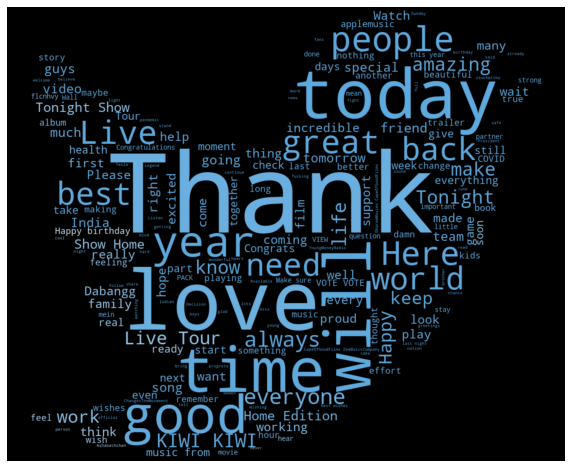

In [149]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(male_words)

# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()

In [150]:
# Generate word cloud for females
female_words = ' '.join(text for text in tweets['clean_text'][tweets['gender']==1])

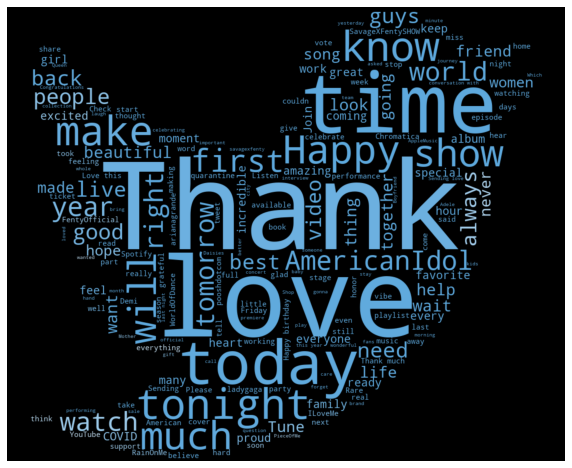

In [151]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(female_words)

# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()

In [324]:
# Hashtags
def Hashtags_Extract(x):
    hashtags=[]
    
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r'#(\w+)',i)
        hashtags.append(ht)
    
    return hashtags

# Hashtags from males
ht_male = Hashtags_Extract(tw['clean_text'][tw['gender']==0])
ht_male

[[],
 [],
 [],
 [],
 [],
 [],
 ['quarantun', 'dancingwithmyself'],
 [],
 [],
 ['nbc', 'fallon'],
 [],
 ['name'],
 [],
 [],
 [],
 ['name'],
 [],
 [],
 [],
 ['name'],
 [],
 [],
 [],
 [],
 [],
 [],
 ['fallontonig'],
 [],
 ['name'],
 ['name'],
 [],
 ['fallonathom', 'quarantun'],
 [],
 [],
 ['firstthingimgoingtodowhenthisisov'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['webbi'],
 [],
 ['thankyounur', 'nursesday'],
 [],
 [],
 ['webbi'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['quarantinemomquot'],
 [],
 [],
 [],
 ['internationalfirefigersday'],
 [],
 [],
 ['fallontonig'],
 [],
 [],
 ['fallonathom', 'nbc'],
 [],
 [],
 [],
 [],
 [],
 ['fallontonig'],
 ['askthefallon'],
 [],
 [],
 [],
 ['quarantineabook'],
 [],
 [],
 [],
 [],
 [],
 ['petduet', 'fallonathom', 'distanc'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['mannkibaat'],
 []

In [326]:
ht_male_unnest = sum(ht_male,[])
ht_male_unnest

['quarantun',
 'dancingwithmyself',
 'nbc',
 'fallon',
 'name',
 'name',
 'name',
 'fallontonig',
 'name',
 'name',
 'fallonathom',
 'quarantun',
 'firstthingimgoingtodowhenthisisov',
 'webbi',
 'thankyounur',
 'nursesday',
 'webbi',
 'quarantinemomquot',
 'internationalfirefigersday',
 'fallontonig',
 'fallonathom',
 'nbc',
 'fallontonig',
 'askthefallon',
 'quarantineabook',
 'petduet',
 'fallonathom',
 'distanc',
 'mannkibaat',
 'aatmanirbharbharat',
 'aatmanirbharbharat',
 'aatmanirbharbharat',
 'ahmaudarberi',
 'trollsworldtour',
 'socialdistanc',
 'fbf',
 'name',
 'trollsworldtour',
 'trollsworldtour',
 'newmusicdaili',
 'trollsworldtour',
 'tinydiamond',
 'believechalleng',
 'trollsworldtour',
 'trollsworldtour',
 'trollsworldtour',
 'maga',
 'backontrack',
 'fit',
 'nutrit',
 'famili',
 'madeiraisland',
 'comebackstrong',
 'comebackstrong',
 'stayact',
 'stayact',
 'siiiimmmmm',
 'stayhom',
 'stayhomestaysaf',
 'stayhomesavel',
 'ucl',
 'forzajuv',
 'finoallafin',
 'forzajuv',


In [327]:
# Hashtags from females
ht_female = Hashtags_Extract(tw['clean_text'][tw['gender']==1])
ht_female

[[],
 [],
 [],
 [],
 [],
 [],
 ['thevoic'],
 ['thevoic'],
 [],
 [],
 ['smallvictori'],
 ['disneyfamilysingalong'],
 [],
 [],
 [],
 [],
 ['throwbackthursday'],
 ['tbt'],
 [],
 ['disneyfamilysingalong'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['tbt'],
 [],
 [],
 [],
 ['stayhom'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['globaleffort', 'stayhom'],
 [],
 [],
 ['megustavideo'],
 ['megustavideo'],
 [],
 [],
 [],
 ['megustavideo'],
 ['megustavideo'],
 ['allin'],
 ['demi'],
 [],
 ['dearclassof', 'withm'],
 [],
 ['ilovem'],
 [],
 ['demi'],
 [],
 [],
 ['ilovem'],
 ['listeningtogeth'],
 ['ilovem'],
 ['ilovem'],
 [],
 ['demi'],
 ['ilovem'],
 [],
 ['ilovem'],
 [],
 ['demi'],
 ['ilovem', 'imreadi'],
 [],
 ['imreadi'],
 ['imreadi'],
 ['thementalhealthfund'],
 ['imreadi'],
 ['imreadi'],
 ['imreadi'],
 ['imreadi'],
 ['imreadi', 'teamdemi', 'teamsam', 'samanddemi'],
 ['disneyfamilysingalong'],
 ['imreadi'],
 ['imreadi'],
 [],
 ['imreadi'],
 [],
 [],
 [],
 [],
 ['ilovem'

In [139]:
ht_female_unnest = sum(ht_female,[])
ht_female_unnest

NameError: name 'ht_female' is not defined

In [138]:
# Counting the frequency of the words for males
word_freq_male = nltk.FreqDist(ht_male_unnest)
word_freq_male

NameError: name 'ht_male_unnest' is not defined

In [359]:
# Create a dataframe for the most frequently used words in hashtags
df_male = pd.DataFrame(word_freq_male, columns=["hashtags", "count"])
df_male.head(10)

,hashtags,count


# Prepare the text

In [295]:
## Import Libraries
import pandas as pd

import regex as re
import spacy

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.svm import LinearSVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import warnings
warnings.filterwarnings('ignore')

In [212]:
nlp = spacy.load('en')

# Modeling

In [321]:
# Features and Labels
X = tw['clean_text']
y = tw['gender']

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [308]:
# create a matrix of word counts from the text
counts = CountVectorizer()

In [309]:
# do the actual counting
A = counts.fit_transform(X_train, y_train)

In [310]:
# create a classifier using SVC
classifier = LinearSVC()

In [311]:
# train the classifier with the training data
classifier.fit(A.toarray(), y_train)

LinearSVC()

In [312]:
# do the transformation for the test data
# NOTE: use `transform()` instead of `fit_transform()`
B = counts.transform(X_test)

In [313]:
# make predictions based on the test data
predictions = classifier.predict(B)
predictions

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1])

In [322]:
# check the accuracy
print('Accuracy: %.4f' % accuracy_score(y_test, predictions))

Accuracy: 0.6007


In [208]:
# helper function to show results and charts
def show_summary_report(actual, prediction):

    if isinstance(actual, pd.Series):
        actual = actual.values
    if actual.dtype.name == 'object':
        actual = actual.astype(int)
    if prediction.dtype.name == 'object':
        prediction = prediction.astype(int)

    accuracy_ = accuracy_score(actual, prediction)
    precision_ = precision_score(actual, prediction)
    recall_ = recall_score(actual, prediction)
    roc_auc_ = roc_auc_score(actual, prediction)

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_)
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_)
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_)
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_)
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)
    average_precision = average_precision_score(actual, prediction)
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, prediction)
    roc_auc = auc(fpr, tpr)

    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')
    
    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()
    
    return (accuracy_, precision_, recall_, roc_auc_)

Accuracy : 0.6007 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.6650 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7278 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.5583                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


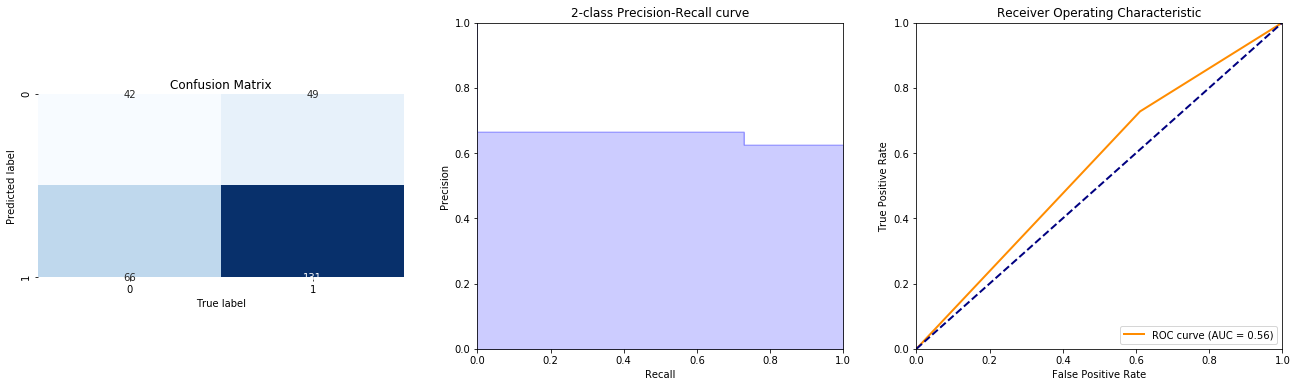

(0.6006944444444444,
 0.6649746192893401,
 0.7277777777777777,
 0.5583333333333333)

In [323]:
show_summary_report(y_test, predictions)